In [122]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from apyori import apriori
from efficient_apriori import apriori as eapriori



In [123]:
MOVIES_PATH = './Datasets/movies.csv'
RATINGS_PATH = './Datasets/ratings.csv'

In [124]:
movies_df = pd.read_csv(MOVIES_PATH)
ratings_df = pd.read_csv(RATINGS_PATH)


In [125]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [126]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [127]:
movies_df_missing = movies_df.isnull().sum()
movies_df_missing

movieId    0
title      0
genres     0
dtype: int64

In [128]:
ratings_df_missing = ratings_df.isnull().sum()
ratings_df_missing

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [129]:
movies_ratings_df = pd.merge(movies_df, ratings_df, on='movieId')
movies_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   movieId    100836 non-null  int64  
 1   title      100836 non-null  object 
 2   genres     100836 non-null  object 
 3   userId     100836 non-null  int64  
 4   rating     100836 non-null  float64
 5   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 5.4+ MB


In [130]:
median_ = movies_ratings_df.groupby('title').size().median()
rating_counts = movies_ratings_df.groupby("title").size()

In [131]:
rating_more_median = rating_counts[rating_counts > median_]
rating_more_100 = rating_counts[rating_counts > 100]

## Question 1 - Top Movies regarding to ratings Count

<Axes: ylabel='title'>

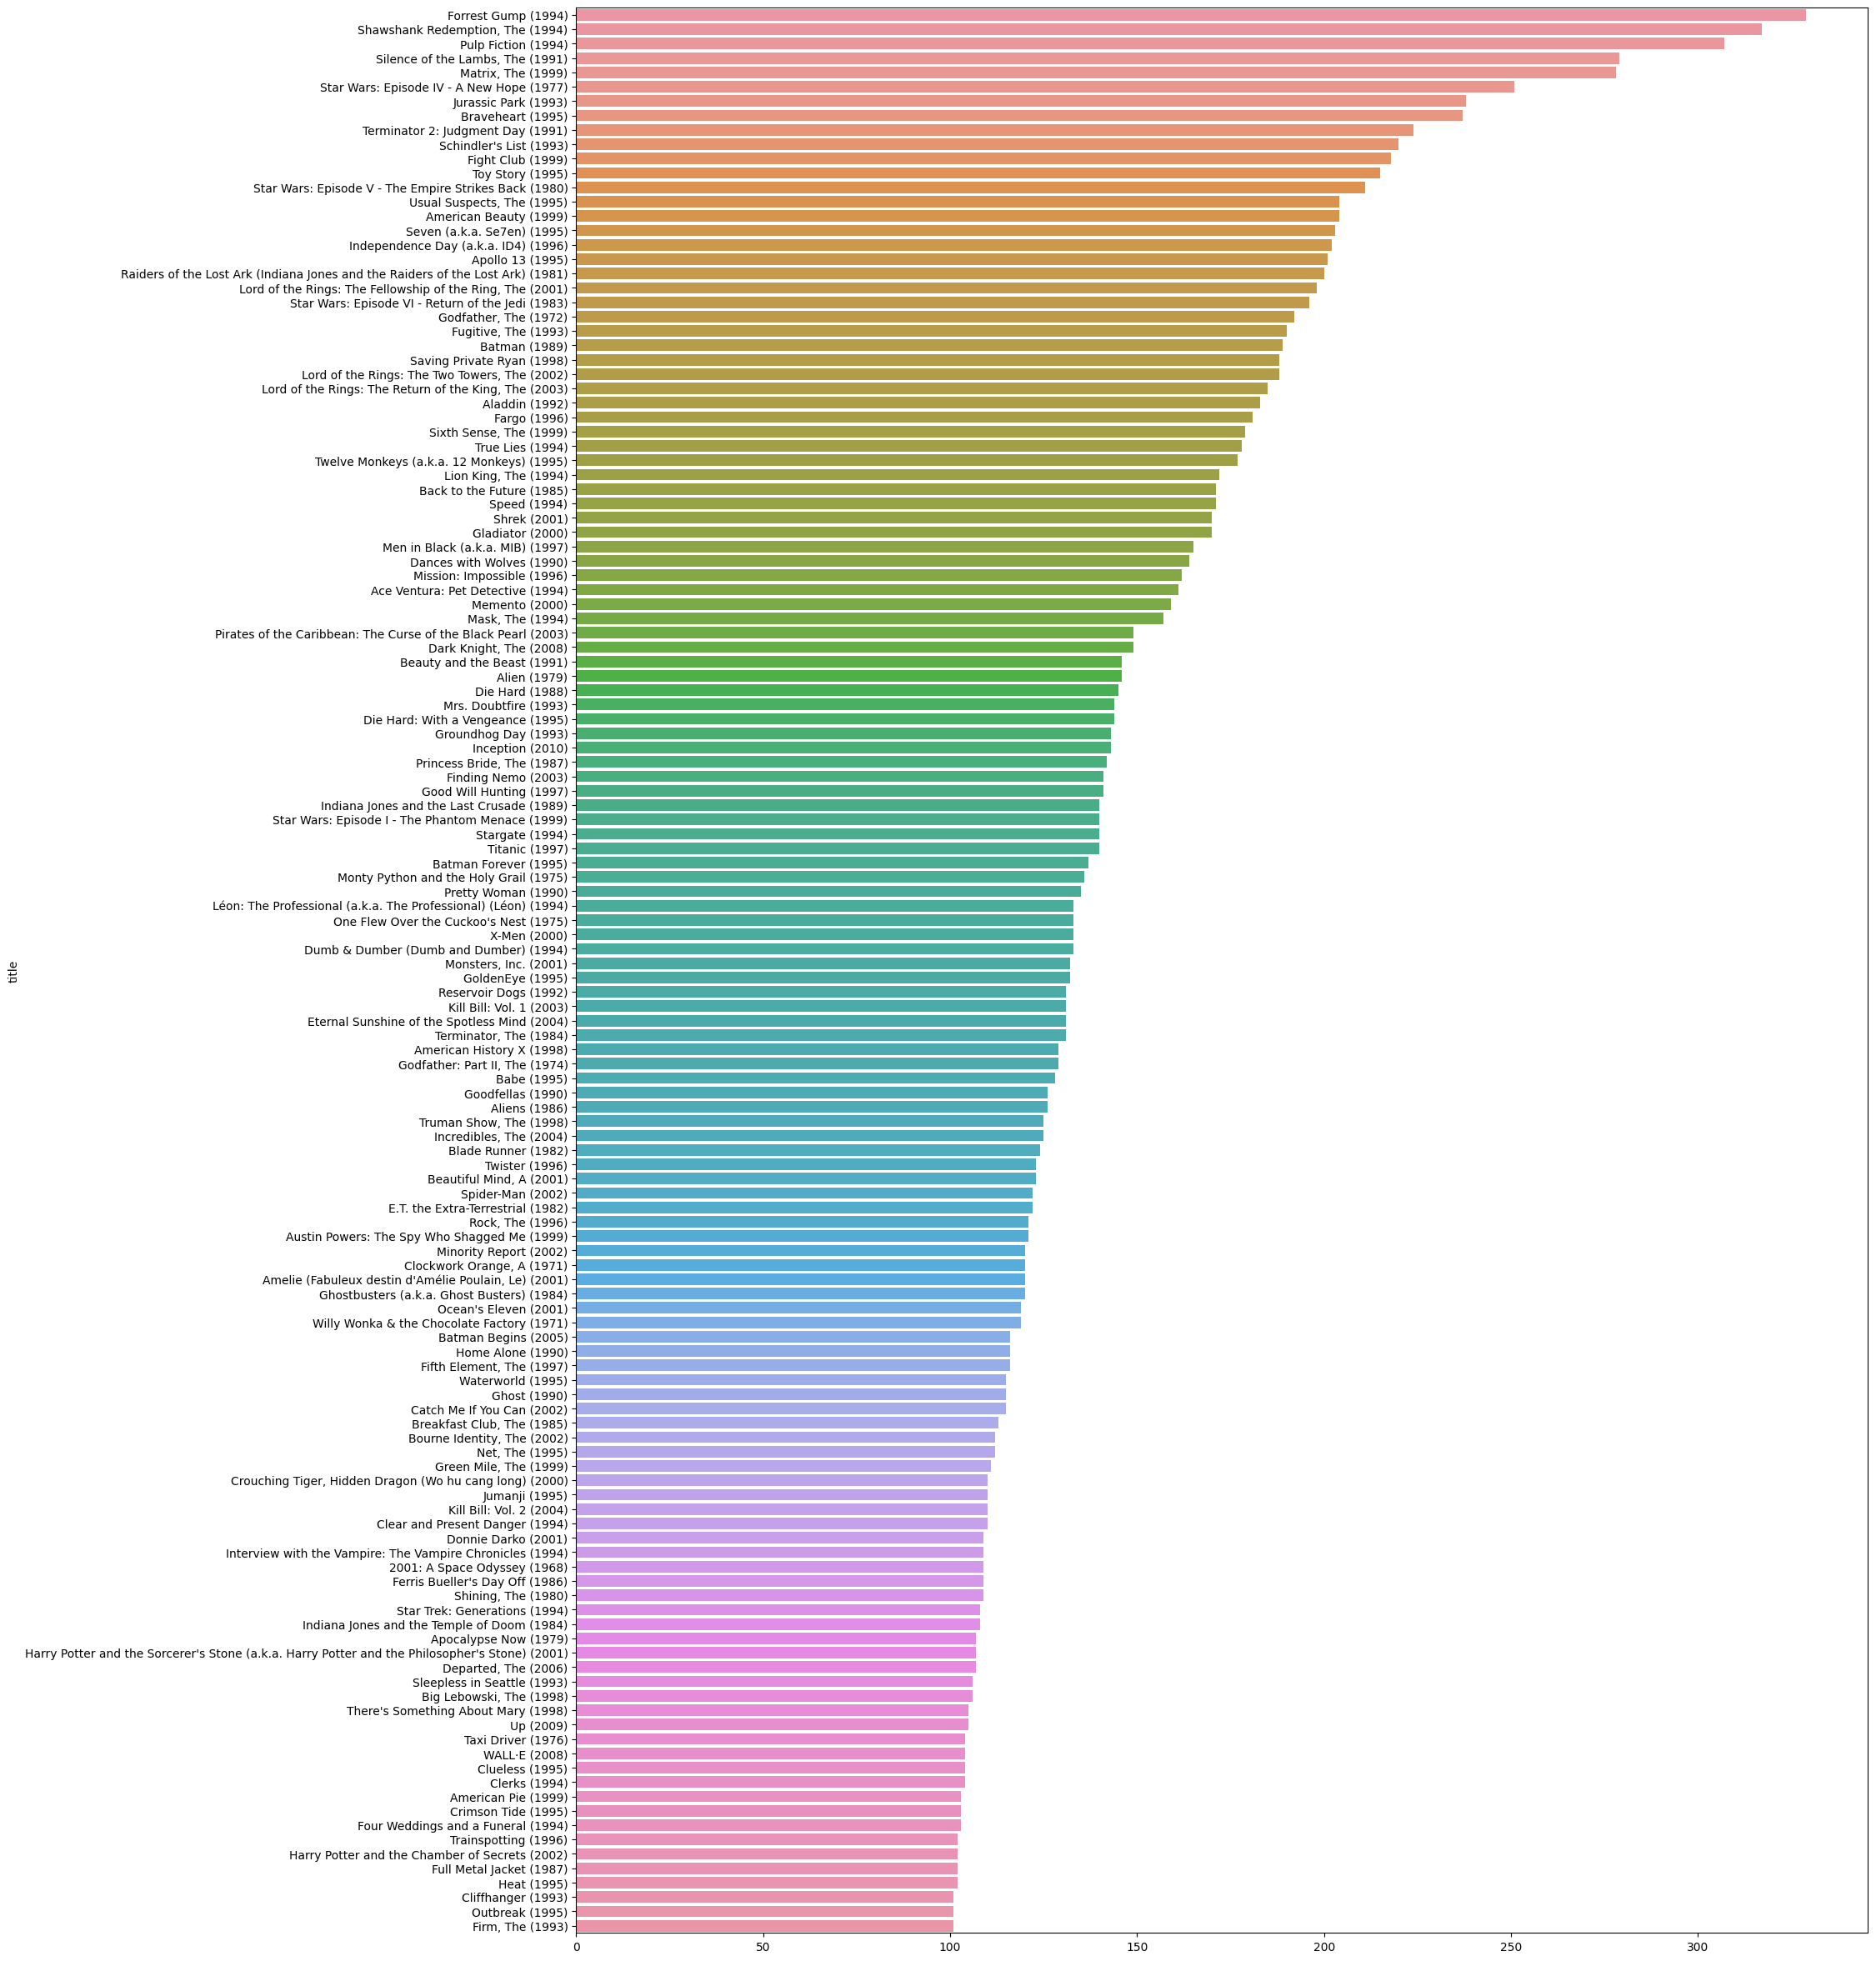

In [132]:
rating_more_100 = rating_more_100.sort_values(ascending=False)
plt.figure(figsize=(20,30))
sns.barplot(x=rating_more_100.values , y=rating_more_100.index)

## Question 2 

### Number of Reviews

In [133]:
ratings_df.shape[0]

100836

### Number of Unique Movies

In [134]:
movies_df["movieId"].nunique()

9742

### 10 Movies with Most Reviews

In [135]:
rating_counts.sort_values(ascending=False)[:10]

title
Forrest Gump (1994)                          329
Shawshank Redemption, The (1994)             317
Pulp Fiction (1994)                          307
Silence of the Lambs, The (1991)             279
Matrix, The (1999)                           278
Star Wars: Episode IV - A New Hope (1977)    251
Jurassic Park (1993)                         238
Braveheart (1995)                            237
Terminator 2: Judgment Day (1991)            224
Schindler's List (1993)                      220
dtype: int64

### Number of Forrest Gump Reviews

In [136]:
movies_ratings_df.groupby("title").size()["Forrest Gump (1994)"]

329

## Question 3 - Apriori and FPGrowth

In [137]:
transaction_dict = movies_ratings_df.groupby("userId")["title"].apply(list).to_dict()

In [138]:
transaction_db = [itemsets for itemsets in transaction_dict.values()]
transaction_db

[['Toy Story (1995)',
  'Grumpier Old Men (1995)',
  'Heat (1995)',
  'Seven (a.k.a. Se7en) (1995)',
  'Usual Suspects, The (1995)',
  'From Dusk Till Dawn (1996)',
  'Bottle Rocket (1996)',
  'Braveheart (1995)',
  'Rob Roy (1995)',
  'Canadian Bacon (1995)',
  'Desperado (1995)',
  'Billy Madison (1995)',
  'Clerks (1994)',
  'Dumb & Dumber (Dumb and Dumber) (1994)',
  'Ed Wood (1994)',
  'Star Wars: Episode IV - A New Hope (1977)',
  'Pulp Fiction (1994)',
  'Stargate (1994)',
  'Tommy Boy (1995)',
  'Clear and Present Danger (1994)',
  'Forrest Gump (1994)',
  'Jungle Book, The (1994)',
  'Mask, The (1994)',
  'Blown Away (1994)',
  'Dazed and Confused (1993)',
  'Fugitive, The (1993)',
  'Jurassic Park (1993)',
  'Mrs. Doubtfire (1993)',
  "Schindler's List (1993)",
  'So I Married an Axe Murderer (1993)',
  'Three Musketeers, The (1993)',
  'Tombstone (1993)',
  'Dances with Wolves (1990)',
  'Batman (1989)',
  'Silence of the Lambs, The (1991)',
  'Pinocchio (1940)',
  'Fargo (1

In [163]:
min_supps = [0.1,0.2,0.3,0.5]
frequent_itemsets = {}
for min_supp in min_supps:
    print(f"starting for support: {min_supp}")
    itemsets, rules = list(eapriori(transaction_db, min_support = min_supp))
    print(f"patterns found with lengths: {itemsets.keys()}")
    keys_to_remove = list(itemsets.keys())[:2]
    for key in keys_to_remove:
        print(f"deleting {key}-patterns")
        del itemsets[key]
    frequent_itemsets[min_supp] = itemsets


starting for support: 0.1
patterns found with lengths: dict_keys([1, 2, 3, 4, 5, 6, 7, 8])
deleting 1-patterns
deleting 2-patterns
starting for support: 0.2
patterns found with lengths: dict_keys([1, 2, 3, 4])
deleting 1-patterns
deleting 2-patterns
starting for support: 0.3
patterns found with lengths: dict_keys([1, 2])
deleting 1-patterns
deleting 2-patterns
starting for support: 0.5
patterns found with lengths: dict_keys([1])
deleting 1-patterns


In [181]:
for min_supp, itemsets in frequent_itemsets.items():
    print(7*"=",f"min_supp: {min_supp}",7*"=")
    acc = 0
    for length,transactions in itemsets.items():
        print(f"{len(transactions)} of {length}-pattern")
        acc += len(transactions)
    print(f"Total: {acc}")

======= min_supp: 0.1 =======
21556 of 3-pattern
38160 of 4-pattern
33837 of 5-pattern
16419 of 6-pattern
4365 of 7-pattern
607 of 8-pattern
Total: 114944
======= min_supp: 0.2 =======
93 of 3-pattern
10 of 4-pattern
Total: 103
======= min_supp: 0.3 =======
Total: 0
======= min_supp: 0.5 =======
Total: 0


In [182]:
min_supps = [0.1,0.2,0.3,0.5]
frequent_itemsets_raw = {}
for min_supp in min_supps:
    print(f"starting for support: {min_supp}")
    itemsets, rules = list(eapriori(transaction_db, min_support = min_supp))
    print(f"patterns found with lengths: {itemsets.keys()}")
    frequent_itemsets_raw[min_supp] = itemsets


starting for support: 0.1
patterns found with lengths: dict_keys([1, 2, 3, 4, 5, 6, 7, 8])
starting for support: 0.2
patterns found with lengths: dict_keys([1, 2, 3, 4])
starting for support: 0.3
patterns found with lengths: dict_keys([1, 2])
starting for support: 0.5
patterns found with lengths: dict_keys([1])
